# Power Analysis

### Setup notebook environment

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.power import TTestIndPower
from scipy import stats

### Notes on power calculations

**Statistical power** - the probability of detecting an effect given an effect exists
<br>
* **Power analysis** 
  + Estimates one of the four following parameters given the other three
    * Effect size - magnitude
      * i.e. Pearson's correlation r - relationship between groups
      * i.e. Cohen's d - difference between groups
    * Sample size - number of observations
    * Significance - probability of rejecting the null if it is true P(false positive)
    * Power - probability of rejecting the null if it is false P(1 - false negative)
<br><br>

* Prospective power analysis
  + Calculated before experiment to determine sample size
  + Greatly preferred to post-hoc
  + Selecting factors
    * Effect size - based on meta-analysis, preliminary study or minimal size of interest
    * Sample size - ideally determined by other three factors, may also consider trade offs by graphing a range
    * Significance - guideline 0.05, but should depend on severity of type I error
    * Power - guideline 0.80, but should depend on severity of type II error
<br><br>

* Post-hoc power analysis
  + Calculated after an experiment to comment on confidence of results
  + Not as useful as you might hope
    * Generally better to use confidence intervals
  + Selecting factors
    * Effect size - observed effect size from a study which did not achieve statistical significance may be a poor estimate. Better to combine multiple studies or consider a range of effect sizes
    * Sample size - size used or just make this a prospective analysis and determine from others
    * Significance - Do not use p-value from study (it is co-variate with power). Use alpha.
    * Power - find from others or just make this a prospective analysis and select desired level
<br><br>
* **statsmodels** python module
  + classes for power calculations
    * TTestIndPower - for independent student's t-test
    * TTestPower - for paired student's t-test
    * See documentation for F-test, Z-test, Chi-Squared test and others
  + solve_power() function
    * Calculates one of the four parameters if set to None
    * Note, use the ratio argument if the size of the second sample is expected to be different
  + plot_power() function
    * Generate power curves

### Estimating sample size

In [30]:
# Estimate sample size via power analysis
alpha = 0.05
power = 0.80
effect = 0.80   # Cohen's d for large effect
nobs1 = None    # number of observations of sample 1
ratio = 1       # nobs2 / nobs1 

analysis = TTestIndPower()
result = analysis.solve_power(effect, nobs1, alpha, power, ratio=ratio)
print('Minimum sample size: {0:.0f} (for nobs1)'.format(np.ceil(result)))

Minimum sample size: 26 (for nobs1)


### Power curves

Trade offs between two factors

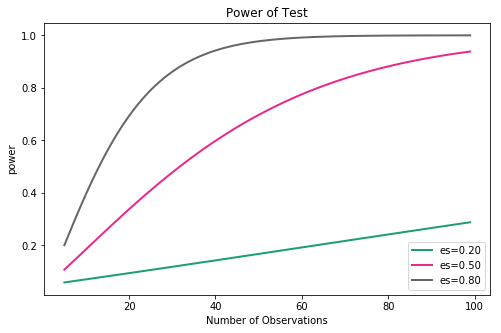

In [21]:
# Plot power curves for varying sample and effect size

# parameters for power analysis
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))
alpha = 0.05

# calculate power curves from multiple power analyses
#   dep_var: variable is used for the horizontal axis

analysis = TTestIndPower()
fig = analysis.plot_power(dep_var='nobs', nobs=sample_sizes, 
                          effect_size=effect_sizes, alpha=alpha)
plt.ylabel('power')
fig.set_size_inches(8, 5)
plt.show()

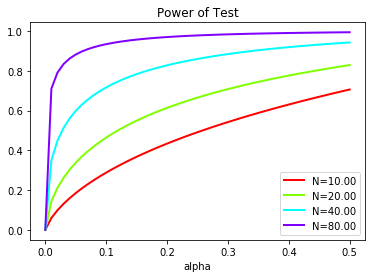

In [22]:
# parameters for power analysis
effect_sizes = 0.5    # np.array([0.5])
sample_sizes = np.array([10, 20, 40, 80])
alphas = np.arange(0.00, 0.51, 0.01)

# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='alpha', 
                    nobs=sample_sizes, 
                    effect_size=effect_sizes,
                    alpha=alphas)
plt.show()

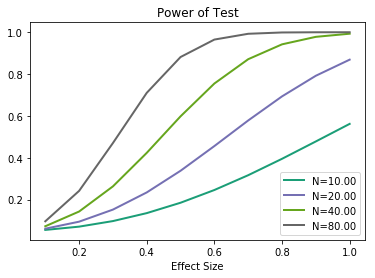

In [23]:
# parameters for power analysis
effect_sizes = np.arange(0.1, 1.1, 0.1) # np.array([0.5])
sample_sizes = np.array([10, 20, 40, 80])
alphas = np.array([0.05])

# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='effect_size', 
                    nobs=sample_sizes, 
                    effect_size=effect_sizes,
                    alpha=alphas)
plt.show()

### Power calculations for correlation coefficients

In [24]:
# Required number of samples to observe specified minimum correlation
# Method 1 - appling formula from websites
# i.e. https://www2.ccrb.cuhk.edu.hk/stat/other/correlation.htm

def correlation_power(expected_r, alpha=0.05, power=0.80):
    ''' Returns the minimum number of observations required to observe an
        expected correlation at a specified two-tailed signifiance (alpha) 
        and power'''

    # Fisher’s arctanh transformation
    c_r = np.arctanh(expected_r)
    
    # Standard normal deviates
    z_alpha = stats.norm.ppf(1 - (alpha / 2)) 
    z_beta = stats.norm.ppf(power)
    
    return int(np.ceil(((z_alpha + z_beta) / c_r) ** 2 + 3))

In [25]:
# Required number of samples to observe specified minimum correlation
# Method 2 - using stats models
# http://jpktd.blogspot.com/2013/03/statistical-power-in-statsmodels.html

# Note: If adapting to calculate power, signifiance or correlation from
#       n_obs, then n_obs -= 3 and result = result (that is no int(ceil()
#       or + 3)

def correlation_power_sm(expected_r, alpha=0.05, power=0.80, n_obs=None):
    ''' Returns the minimum number of observations required to observe an
        expected correlation at a specified two-tailed signifiance (alpha) 
        and power (same as correlation_power, but using stats models)'''
    
    analysis = NormalIndPower()
    result = analysis.solve_power(np.arctanh(expected_r), n_obs, alpha, power, 
                                  ratio=0.0)
    
    return int(np.ceil(result + 3))

In [26]:
# Examples from Ellis
#   example answers appear to round to nearest, rather than round up
#   otherwise the same
print('Comparing correlation power calculation methods:')
print()

# Ellis p52/68 #8 - power 0.50
print('Text: {0:12}'.format(3323))
print('equation: {0:8}'.format(correlation_power(0.034, 0.05, 0.50)))
print('statsmodels: {0:5}'.format(correlation_power_sm(0.034, 0.05, 0.50)))
print()
 
# Ellis p52/68 #8 - power 0.80
print('Text: {0:12}'.format(6787))
print('equation: {0:8}'.format(correlation_power(0.034, 0.05, 0.80)))
print('statsmodels: {0:5}'.format(correlation_power_sm(0.034, 0.05, 0.80)))
print()

# Ellis p53
print('Text: {0:12}'.format(725))
print('equation: {0:8}'.format(correlation_power(0.12, 0.05, 0.90)))
print('statsmodels: {0:5}'.format(correlation_power_sm(0.12, 0.05, 0.90)))
print()

Comparing correlation power calculation methods:

Text:         3323
equation:     3324
statsmodels:  3324

Text:         6787
equation:     6788
statsmodels:  6788

Text:          725
equation:      726
statsmodels:   726



### Retrospective (post-hoc) power analysis

In [36]:
# Ellis p 58 - Posthoc estimate of signifiance at desired power

# From study
mean1 = 87
mean2 = 100
n_obs1 = 6
n_obs2 = 6
s1 = 14 
s2 = 14

# Desired power
power = 0.80

# Pooled stddev (not actually necessiary with equal sample size and variance)
s_pooled = np.sqrt((((n_obs1 - 1) * s1 ** 2) + 
                    ((n_obs2 - 1) * s2 ** 2)) / (n_obs1 + n_obs2 - 2))

# Cohen's d
effect = np.abs(mean1 - mean2) / s_pooled

# Solve for alpha
alpha = None
analysis = TTestIndPower()
result = analysis.solve_power(effect, n_obs1, alpha, power, 
                              ratio=n_obs2 / n_obs1)

print('Signifiance (per text):   {0:.2f}'.format(0.44))
print('Signifiance (calculated): {0:.2f}'.format(result))

Signifiance (per text):   0.44
Signifiance (calculated): 0.44


In [37]:
# Ellis p 59 - posthoc power analysis
#   Note: using effect size from study may not be reliable
#   Note: never use p-value from study as signifiance (continue using alpha)

# From study
mean1 = 87
mean2 = 100
n_obs1 = 6
n_obs2 = 6
s1 = 14 
s2 = 14

# Desired alpha
alpha = 0.05

# Pooled stddev (not actually necessiary with equal sample size and variance)
s_pooled = np.sqrt((((n_obs1 - 1) * s1 ** 2) + 
                    ((n_obs2 - 1) * s2 ** 2)) / (n_obs1 + n_obs2 - 2))

# Cohen's d
effect = np.abs(mean1 - mean2) / s_pooled

# Solve for power
power = None
analysis = TTestIndPower()
result = analysis.solve_power(effect, n_obs1, alpha, power, ratio=n_obs1 / n_obs2)
print('Power (per text):   {0:.2f}'.format(0.31))
print('Power (calculated): {0:.2f}'.format(result))


Power (per text):   0.31
Power (calculated): 0.31


### Power and precision

* A sample size which generates sufficient power may not generate sufficient precision.
* A rule of thumb is: predicted CI_95 = observed_difference +/- 0.7 * delta_80
  + Where delta_80 = The effect size for power of 0.80.
* Alternative estimate n for desired CI

In [38]:
# Ellis p 65 - percision using minimum sample size from power 0.80 calculation
effect_size = 0.50

ebm = 0.7 * effect_size
print('CI_95 (in terms of effect size) = ({0:.2f}, {1:.2f})'
      .format(effect_size - ebm, effect_size + ebm))

CI_95 (in terms of effect size) = (0.15, 0.85)


### Resources

Python power calculations with statsmodels tutorial:<br>
https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/

The Essential Guide to Effect Sizes: Statistical Power, Meta-Analysis, and the Interpretation of Research Results - Paul D. Ellis

Statsmodels blog: http://jpktd.blogspot.com/2013/03/statistical-power-in-statsmodels.html

Other power calculations websites:<br>
https://www2.ccrb.cuhk.edu.hk/stat/other/correlation.htm<br>
http://www.sample-size.net/correlation-sample-size/<br>